# Importing Libraries

In [182]:
import pandas as pd # for handling dataset
import numpy as np  
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, plot_roc_curve, roc_auc_score, classification_report
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [183]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\Second\winequality-red.csv') 

In [184]:
df.head() # to display data from top 5 only 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Attribute Information

Input variables (based on physicochemical tests):
    
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):
    
12 - quality (score between 0 and 10)

In [185]:
df.shape  # to see number of rows & columns

(1599, 12)

In [186]:
df.columns # to display all the columns in the dataset

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [187]:
df.isnull().sum()  # to check null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [189]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


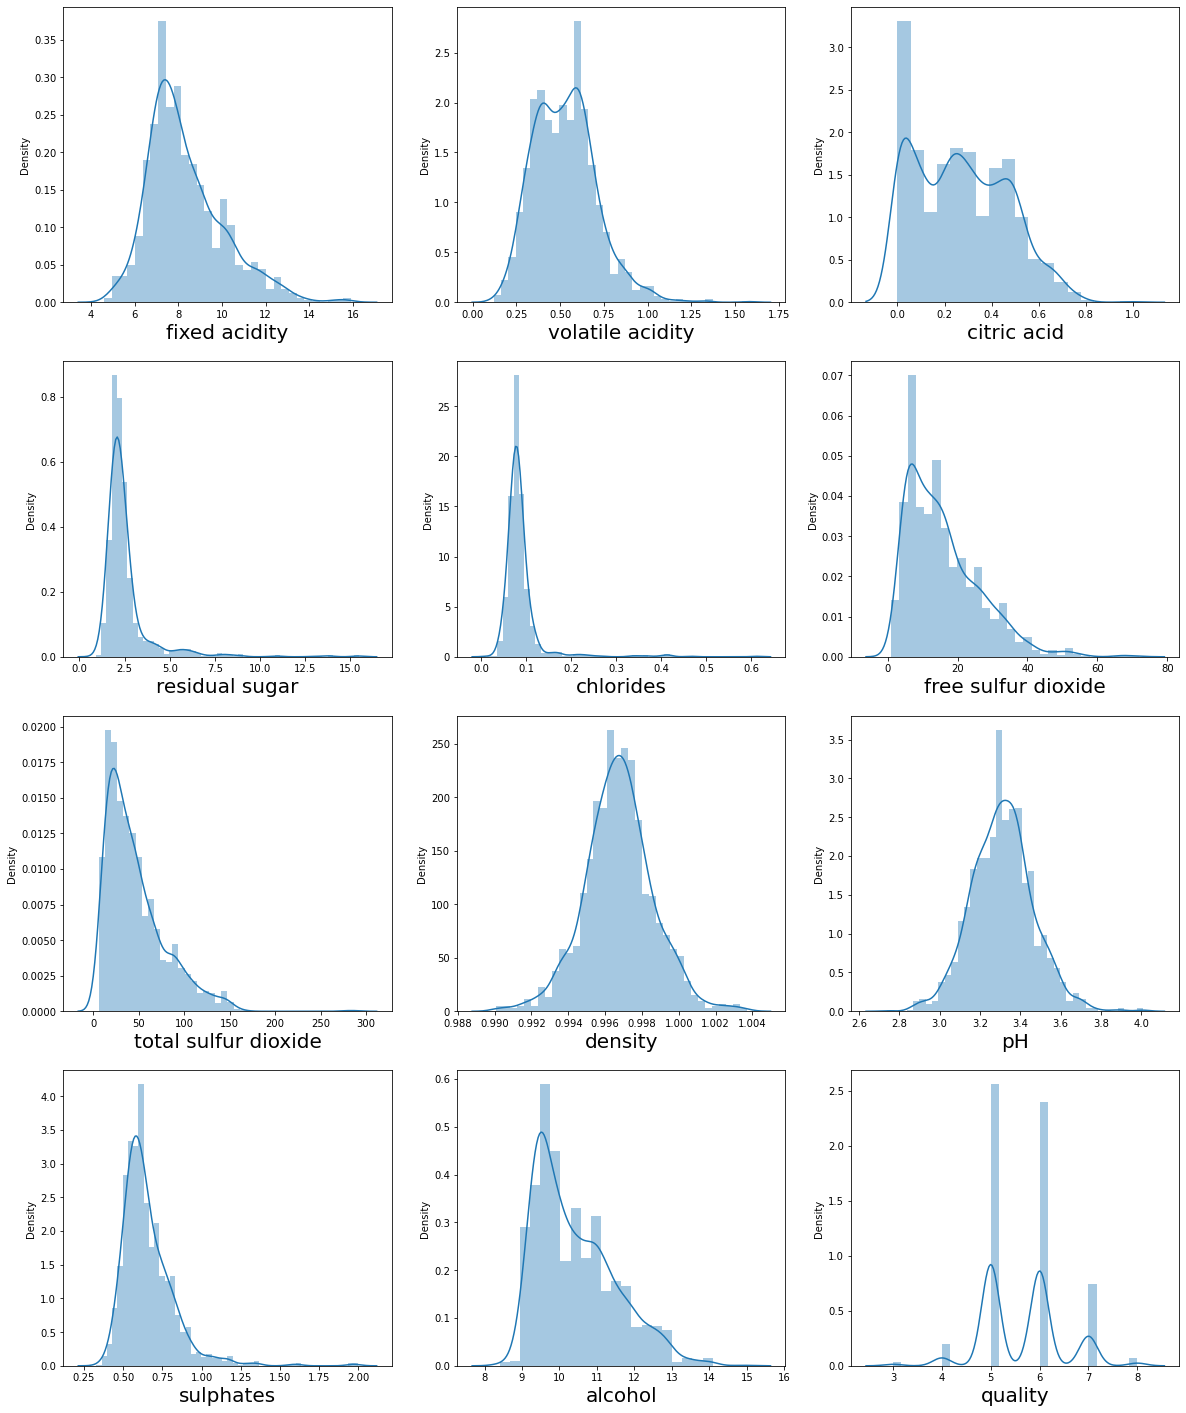

In [190]:
# lets visualize how data is distributed in every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

fixed acidity
0.9818292953262073


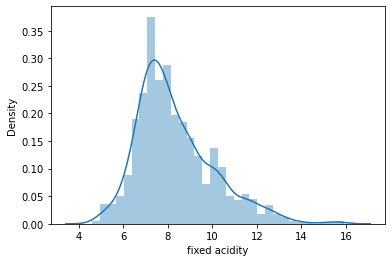

volatile acidity
0.6709623963499574


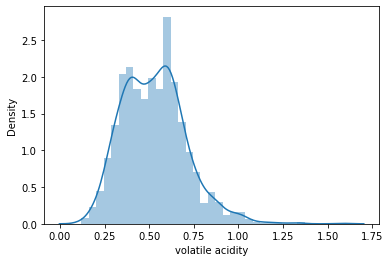

citric acid
0.3180385895475358


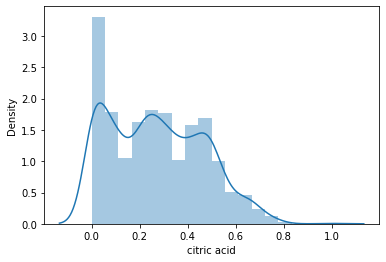

residual sugar
4.536394788805638


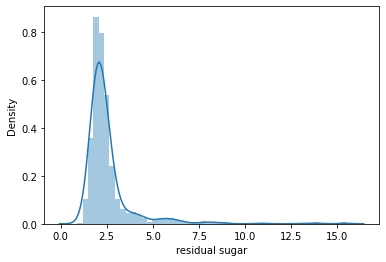

chlorides
5.675016527504259


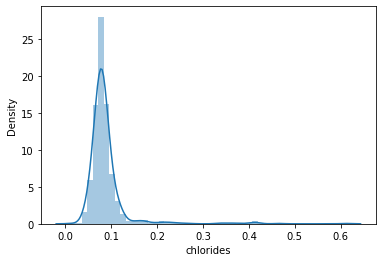

free sulfur dioxide
1.249393847434253


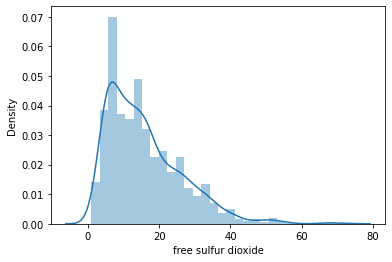

total sulfur dioxide
1.5141091878506638


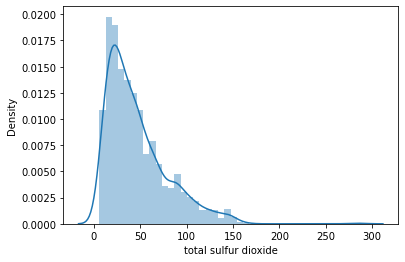

density
0.07122077153539946


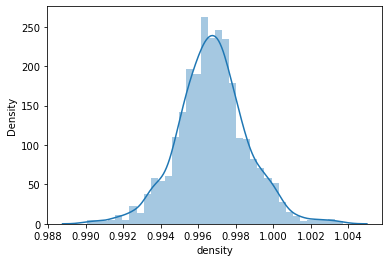

pH
0.19350175891005525


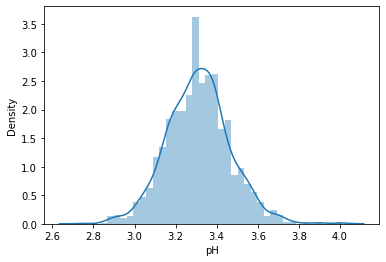

sulphates
2.426393455449087


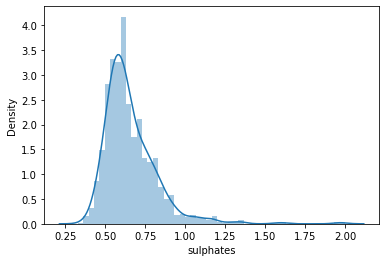

alcohol
0.8600210646566755


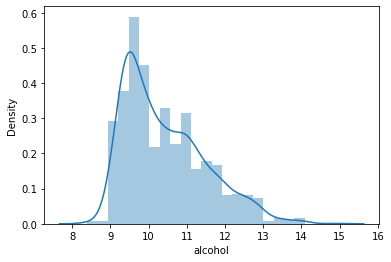

quality
0.21759720553467285


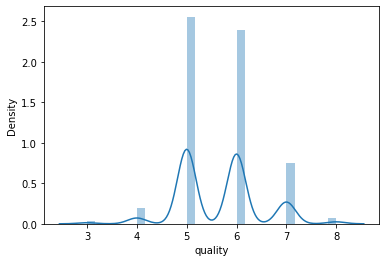

In [191]:
# to see skewness for every column
for col in df:
    print(col)
    print(skew(df[col]))
    
    plt.figure()
    sns.distplot(df[col])
    plt.show()

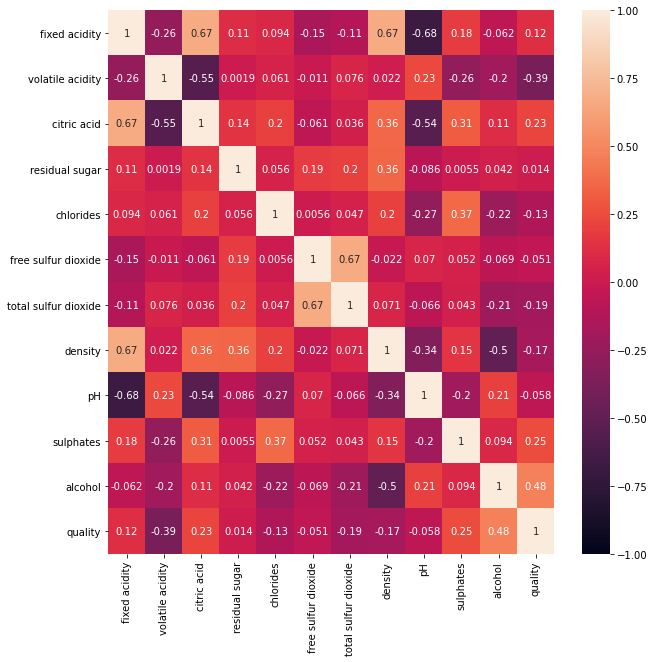

In [192]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

## Applying Log Transformation to remove skewness

In [193]:
df['alcohol'] = np.log(df['alcohol'])
df['sulphates'] = np.log(df['sulphates'])
df['total sulfur dioxide'] = np.log(df['total sulfur dioxide'])
df['free sulfur dioxide'] = np.log(df['free sulfur dioxide'])
df['residual sugar'] = np.log(df['residual sugar'])

In [194]:
skew(df["alcohol"])

0.6612354391959637

In [195]:
skew(df["sulphates"])

0.9210023454949973

In [196]:
skew(df["total sulfur dioxide"])

-0.0792483941903496

In [197]:
skew(df["free sulfur dioxide"])

-0.2338116484095893

In [198]:
skew(df["residual sugar"])

1.8051683835042431

<AxesSubplot:xlabel='quality', ylabel='count'>

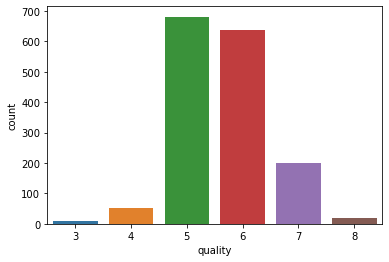

In [199]:
sns.countplot(df['quality'])

In [200]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [201]:
y=df['quality']
X=df.drop('quality', axis=1)

In [202]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [203]:
X_scaled

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.60206208, -0.9943602 ],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.26665831, -0.57286408],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
         0.06477406, -0.57286408],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.70505615,  0.59548446],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.45982537, -0.16823239],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.13308595,  0.59548446]])

In [204]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

# let check the values
vif

,vif,features
0,7.895905,fixed acidity
1,1.776113,volatile acidity
2,3.049284,citric acid
3,1.966672,residual sugar
4,1.434283,chlorides
5,2.865355,free sulfur dioxide
6,3.134761,total sulfur dioxide
7,7.307445,density
8,3.291281,pH
9,1.462649,sulphates


In [205]:
# Features like fixed acidity & density are inter-related to each other, therefore Multicollinearity exists in the dataset.

In [206]:
df=df.drop(columns=['fixed acidity'])

In [207]:
df.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.70,0.00,0.641854,0.076,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5
1,0.88,0.00,0.955511,0.098,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,5
2,0.76,0.04,0.832909,0.092,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,5
3,0.28,0.56,0.641854,0.075,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,6
4,0.70,0.00,0.641854,0.076,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5


In [208]:
# Create Classification version of target variable
df['goodquality'] = [1 if x >= 7 else 0 for x in df['quality']]
# Separate feature variables and target variable
X = df.drop(['quality','goodquality'], axis = 1)
y = df['goodquality']

In [209]:
df.head(10)

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,0.70,0.00,0.641854,0.076,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5,0
1,0.88,0.00,0.955511,0.098,3.218876,4.204693,0.9968,3.20,-0.385662,2.282382,5,0
2,0.76,0.04,0.832909,0.092,2.708050,3.988984,0.9970,3.26,-0.430783,2.282382,5,0
3,0.28,0.56,0.641854,0.075,2.833213,4.094345,0.9980,3.16,-0.544727,2.282382,6,0
4,0.70,0.00,0.641854,0.076,2.397895,3.526361,0.9978,3.51,-0.579818,2.240710,5,0
5,0.66,0.00,0.587787,0.075,2.564949,3.688879,0.9978,3.51,-0.579818,2.240710,5,0
6,0.60,0.06,0.470004,0.069,2.708050,4.077537,0.9964,3.30,-0.776529,2.240710,5,0
7,0.65,0.00,0.182322,0.065,2.708050,3.044522,0.9946,3.39,-0.755023,2.302585,7,1
8,0.58,0.02,0.693147,0.073,2.197225,2.890372,0.9968,3.36,-0.562119,2.251292,7,1
9,0.50,0.36,1.808289,0.071,2.833213,4.624973,0.9978,3.35,-0.223144,2.351375,5,0


In [210]:
# split data into train and test. Model will be build on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=30)

In [211]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [212]:
y_pred = log_reg.predict(x_test)

In [213]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.89

# Using Decision Tree Classifier

In [214]:
# Lets first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [215]:
clf.score(x_train,y_train)

1.0

In [216]:
y_pred = clf.predict(x_test)

In [217]:
# Accuracy of our classification tree
clf.score(x_test,y_test)

0.855

In [218]:
print (classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       350
           1       0.44      0.62      0.52        50

    accuracy                           0.85       400
   macro avg       0.69      0.75      0.72       400
weighted avg       0.88      0.85      0.86       400



## Using GridSearchCV for hyper parameter tuning

In [219]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,10,3),
    'min_samples_leaf' : range (1,10,2),
    'min_samples_split' : range (2,10,2)
}

In [220]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=grid_param,
                          cv=5,
                          n_jobs =-1)

In [221]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10, 3),
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(2, 10, 2)})

In [222]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [223]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =15, min_samples_leaf=5, min_samples_split=14)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=14)

In [224]:
clf.score(x_test,y_test)

0.8625

In [225]:
y_pred = clf.predict(x_test)

In [226]:
accuracy_score(y_test,y_pred)

0.8625

# Random Forest Classifier

In [227]:
rand_clf = RandomForestClassifier(random_state=41)

In [228]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=41)

In [229]:
rand_clf.score(x_test,y_test)

0.9225

# Lets plot ROC AUC Curve to choose the best model

In [230]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [231]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [232]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


# Lets find ROC AUC score

In [233]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.6657142857142856

In [234]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

1.0

In [235]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

1.0

# Lets check ROC AUC curve for the fitted model

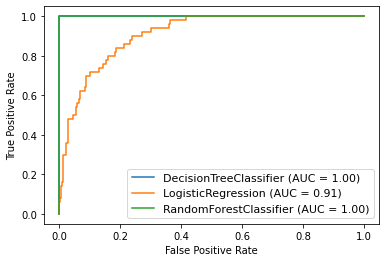

In [236]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

In [237]:
# saving the model to local system
with open('modelForPrediction.sav','wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)